# ML analysis: BD vs control

In [1]:
# importing all the packages I need for all my models
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt 
from sklearn.metrics import classification_report
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn import linear_model
from sklearn.linear_model import LogisticRegressionCV
import random
pd.options.mode.chained_assignment = None

## Transcripts for ML input

I used two sets of transcripts, each compared with a benchmark set of random transcripts, for ML input:

1. random transcripts compared with transcripts on the MT chromosome
2. random transcripts compared with transcripts with the GO term 'mitochondrial respirasome'

### Random transcripts

In [2]:
# selection of random transcripts from list
# random.choices(tx_BDcontrol, k=13)
randomtx_MTchr = ['ENST00000600080.5','ENST00000397572.5','ENST00000635877.1','ENST00000543942.6',
'ENST00000286494.9','ENST00000605544.1','ENST00000561852.5','ENST00000429670.3',
'ENST00000511500.1','ENST00000475796.5','ENST00000547135.5','ENST00000605689.1',
'ENST00000492310.5']

In [3]:
# selection of random transcripts from list
# random.choices(tx_BDcontrol, k=255)
randomtx_MTresp = ['ENST00000535515.5','ENST00000574494.1','ENST00000531227.1','ENST00000563462.1',
'ENST00000518450.5','ENST00000641655.1','ENST00000369669.5','ENST00000627703.2',
'ENST00000531427.5','ENST00000452554.3','ENST00000548524.5','ENST00000533270.1',
'ENST00000636277.1','ENST00000580806.5','ENST00000444189.7','ENST00000588683.1',
'ENST00000569320.5','ENST00000432343.1','ENST00000402297.6','ENST00000632698.1',
'ENST00000381286.7','ENST00000652439.1','ENST00000473413.1','ENST00000447555.5',
'ENST00000379651.7','ENST00000393867.5','ENST00000508053.5','ENST00000537833.5',
'ENST00000620667.1','ENST00000473647.1','ENST00000430838.2','ENST00000508208.5',
'ENST00000586762.2','ENST00000422787.1','ENST00000644629.1','ENST00000620127.3',
'ENST00000593411.1','ENST00000591228.4','ENST00000361733.7','ENST00000472541.5',
'ENST00000414977.5','ENST00000556079.1','ENST00000371208.4','ENST00000511891.5',
'ENST00000347401.7','ENST00000478640.6','ENST00000483371.1','ENST00000367058.7',
'ENST00000639822.1','ENST00000439752.1','ENST00000374885.5','ENST00000253925.11',
'ENST00000419015.1','ENST00000520992.5','ENST00000343599.5','ENST00000472864.1',
'ENST00000456906.5','ENST00000544168.5','ENST00000467490.5','ENST00000533498.1',
'ENST00000496105.1','ENST00000633965.1','ENST00000565585.5','ENST00000207636.9',
'ENST00000542832.1','ENST00000490348.1','ENST00000442232.1','ENST00000640582.2',
'ENST00000448958.2','ENST00000634908.1','ENST00000470954.2','ENST00000416465.5',
'ENST00000479323.1','ENST00000478224.5','ENST00000572244.5','ENST00000431286.1',
'ENST00000585531.1','ENST00000475994.1','ENST00000491728.5','ENST00000619532.1',
'ENST00000611198.4','ENST00000580145.5','ENST00000320665.10','ENST00000565546.5',
'ENST00000453375.1','ENST00000632533.1','ENST00000486535.1','ENST00000310078.12',
'ENST00000402399.6','ENST00000507142.5','ENST00000622674.1','ENST00000478475.5',
'ENST00000512818.5','ENST00000374840.8','ENST00000555573.5','ENST00000495742.5',
'ENST00000549451.1','ENST00000507115.5','ENST00000237163.9','ENST00000650921.1',
'ENST00000492457.1','ENST00000483378.1','ENST00000453856.5','ENST00000638438.1',
'ENST00000628302.2','ENST00000469014.1','ENST00000525605.1','ENST00000478680.1',
'ENST00000643493.1','ENST00000640045.1','ENST00000466375.2','ENST00000643537.1',
'ENST00000342669.7','ENST00000511593.6','ENST00000602622.5','ENST00000560913.1',
'ENST00000326183.3','ENST00000300870.15','ENST00000640690.1','ENST00000632297.1',
'ENST00000391411.10','ENST00000409324.7','ENST00000548732.2','ENST00000418576.3',
'ENST00000505441.1','ENST00000427822.6','ENST00000453515.1','ENST00000372183.7',
'ENST00000526686.1','ENST00000469169.5','ENST00000588492.5','ENST00000423263.5',
'ENST00000372611.5','ENST00000498836.5','ENST00000564132.1','ENST00000524603.1',
'ENST00000468878.1','ENST00000471097.1','ENST00000395305.7','ENST00000602865.1',
'ENST00000382315.7','ENST00000518154.5','ENST00000534783.1','ENST00000457662.2',
'ENST00000537562.5','ENST00000642520.1','ENST00000632958.1','ENST00000585879.1',
'ENST00000426266.5','ENST00000461659.1','ENST00000638304.1','ENST00000419794.1',
'ENST00000481453.5','ENST00000443437.6','ENST00000477695.5','ENST00000558092.1',
'ENST00000643264.1','ENST00000332826.7','ENST00000451587.5','ENST00000534760.1',
'ENST00000481032.1','ENST00000265689.9','ENST00000607208.1','ENST00000382032.3',
'ENST00000510299.2','ENST00000466626.1','ENST00000528628.5','ENST00000526842.5',
'ENST00000475405.2','ENST00000534688.2','ENST00000596682.5','ENST00000472867.2',
'ENST00000381567.8','ENST00000418646.5','ENST00000383130.7','ENST00000410040.5',
'ENST00000488876.5','ENST00000358912.5','ENST00000533695.1','ENST00000568545.5',
'ENST00000448299.6','ENST00000422720.2','ENST00000473946.1','ENST00000401672.7',
'ENST00000564192.5','ENST00000506646.5','ENST00000622731.4','ENST00000421470.1',
'ENST00000592814.5','ENST00000527790.5','ENST00000510493.5','ENST00000273590.3',
'ENST00000576460.5','ENST00000642399.1','ENST00000583328.5','ENST00000619160.4',
'ENST00000348261.11','ENST00000397472.6','ENST00000457841.5','ENST00000341686.7',
'ENST00000480859.5','ENST00000545955.5','ENST00000621629.4','ENST00000436730.7',
'ENST00000538766.1','ENST00000432228.1','ENST00000495855.1','ENST00000567921.1',
'ENST00000496784.1','ENST00000220531.7','ENST00000549482.1','ENST00000428931.6',
'ENST00000415077.1','ENST00000492838.1','ENST00000543539.1','ENST00000562008.5',
'ENST00000519082.5','ENST00000608830.5','ENST00000498181.6','ENST00000468607.1',
'ENST00000646379.1','ENST00000633452.1','ENST00000609658.1','ENST00000525990.1',
'ENST00000579140.5','ENST00000620763.1','ENST00000487389.5','ENST00000482397.1',
'ENST00000489123.1','ENST00000530553.1','ENST00000529311.5','ENST00000426683.5',
'ENST00000518855.5','ENST00000640831.1','ENST00000485277.1','ENST00000451664.1',
'ENST00000535955.5','ENST00000499453.2','ENST00000533651.1','ENST00000587646.1',
'ENST00000381392.5','ENST00000402105.7','ENST00000400318.6','ENST00000493625.5',
'ENST00000544078.2','ENST00000294337.7','ENST00000603850.1','ENST00000389574.7',
'ENST00000248054.9','ENST00000465841.1','ENST00000483949.1','ENST00000469838.5',
'ENST00000359866.9','ENST00000291700.9', 'ENST00000477078.2']

### Transcripts on MT chromosome

In [4]:
# reading in MT transcripts from MT chromosome
mt_tx = pd.read_csv("/Users/elenazhang/ncbi/public/sra/mt.txt", delimiter = "\t")
mt_tx.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version
0,ENSG00000210049,ENSG00000210049.1,ENST00000387314,ENST00000387314.1
1,ENSG00000211459,ENSG00000211459.2,ENST00000389680,ENST00000389680.2
2,ENSG00000210077,ENSG00000210077.1,ENST00000387342,ENST00000387342.1
3,ENSG00000210082,ENSG00000210082.2,ENST00000387347,ENST00000387347.2
4,ENSG00000209082,ENSG00000209082.1,ENST00000386347,ENST00000386347.1


In [5]:
mt_tx_ids = mt_tx["Transcript stable ID version"].to_list()
print(mt_tx_ids)
len(mt_tx_ids)

['ENST00000387314.1', 'ENST00000389680.2', 'ENST00000387342.1', 'ENST00000387347.2', 'ENST00000386347.1', 'ENST00000361390.2', 'ENST00000387365.1', 'ENST00000387372.1', 'ENST00000387377.1', 'ENST00000361453.3', 'ENST00000387382.1', 'ENST00000387392.1', 'ENST00000387400.1', 'ENST00000387405.1', 'ENST00000387409.1', 'ENST00000361624.2', 'ENST00000387416.2', 'ENST00000387419.1', 'ENST00000361739.1', 'ENST00000387421.1', 'ENST00000361851.1', 'ENST00000361899.2', 'ENST00000362079.2', 'ENST00000387429.1', 'ENST00000361227.2', 'ENST00000387439.1', 'ENST00000361335.1', 'ENST00000361381.2', 'ENST00000387441.1', 'ENST00000387449.1', 'ENST00000387456.1', 'ENST00000361567.2', 'ENST00000361681.2', 'ENST00000387459.1', 'ENST00000361789.2', 'ENST00000387460.2', 'ENST00000387461.2']


37

### Transcripts with GO term 'mitochondrial respirasome'

In [6]:
mtres_tx = pd.read_csv("/Volumes/horizons/mart_export_mtrespirasome.txt", delimiter = "\t")
mtres_tx.head()

,Gene stable ID,Gene stable ID version,Transcript stable ID,Transcript stable ID version
0,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
1,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
2,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
3,ENSG00000198888,ENSG00000198888.2,ENST00000361390,ENST00000361390.2
4,ENSG00000198763,ENSG00000198763.3,ENST00000361453,ENST00000361453.3


In [7]:
mtres_tx_ids = mtres_tx["Transcript stable ID version"].to_list()
print(mtres_tx_ids)
len(mtres_tx_ids)

['ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361390.2', 'ENST00000361453.3', 'ENST00000361453.3', 'ENST00000361453.3', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361624.2', 'ENST00000361739.1', 'ENST00000362079.2', 'ENST00000361227.2', 'ENST00000361227.2', 'ENST00000361227.2', 'ENST00000361335.1', 'ENST00000361335.1', 'ENST00000361381.2', 'ENST00000361381.2', 'ENST00000361381.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361567.2', 'ENST00000361681.2', 'ENST00000361789.2', 'ENST00000361789.2', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000605916.1', 'ENST00000607132.1', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000630971.2', 'ENST00000605927.3', 'ENST00000630511.1', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST00000628740.2', 'ENST0000062

881

## Metadata and matrix preparation

In [8]:
matrix_BDcontrol = pd.read_csv("/Volumes/horizons/test/4_analysis/sleuth_matrix.csv")

In [9]:
# reorgnising matrix
matrix_BDcontrol_T = matrix_BDcontrol.T
matrix_BDcontrol_T.columns = matrix_BDcontrol_T.iloc[0]
matrix_BDcontrol_T = matrix_BDcontrol_T[1:]
matrix_BDcontrol_T = matrix_BDcontrol_T.reset_index()
matrix_BDcontrol_T.head()

Unnamed: 0,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652760.1,ENST00000652762.1,ENST00000652763.1,ENST00000652764.1,ENST00000652765.1,ENST00000652766.1,ENST00000652767.1,ENST00000652768.1,ENST00000652770.1,ENST00000652771.1
0,SRR3438571,2551.983048,1330.087459,1234.997,4144.753252,206.672203,208.917537,265.251734,5523.082595,396.31265,...,18.261604,533.522165,5.993668,98.226222,8.753334,0.0,37.560203,0.0,17.146342,28.337134
1,SRR3438572,2507.592369,1346.437221,974.277663,4077.270891,268.402165,195.147772,265.128869,5692.124065,371.93185,...,24.190424,542.399591,10.980011,102.359472,0.0,0.0,15.924764,0.0,18.53611,22.730611
2,SRR3438577,2948.257293,1599.000017,1401.005937,4316.820924,503.303341,281.275546,231.073764,8017.025484,339.703646,...,0.0,399.543099,0.0,60.30431,0.0,0.0,37.517432,0.0,0.0,26.887858
3,SRR3438578,2943.763552,1433.503101,1123.231455,4402.044286,606.284567,234.99091,205.922175,7698.499842,352.302989,...,38.431319,390.685793,0.0,67.788132,0.0,0.0,0.0,0.0,0.0,124.81487
4,SRR3438597,2870.015313,1219.475082,1541.735374,4543.616728,609.092094,251.161994,294.832037,8800.58496,425.141755,...,19.378988,785.713263,0.0,41.852314,0.0,7.488409,11.248815,0.0,0.0,68.834805


In [10]:
# reading in metadata for BD and control samples
metadata_BDcontrol = pd.read_csv("/Volumes/horizons/test/4_metadata/metadata.txt", delimiter = "\t")
metadata_BDcontrol.head()

,sample,clinical_diagnosis,age_at_death,gender,ethnicity
0,SRR3438571,BD,69,male,Caucasian
1,SRR3438572,BD,69,male,Caucasian
2,SRR3438577,BD,32,male,Caucasian
3,SRR3438578,BD,32,male,Caucasian
4,SRR3438597,control,32,male,Caucasian


In [11]:
# merging matrix with metadata
matrix_metadata_BDcontrol = matrix_BDcontrol_T.merge(metadata_BDcontrol, left_on="index", right_on="sample")
matrix_metadata_BDcontrol.head()

,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652766.1,ENST00000652767.1,ENST00000652768.1,ENST00000652770.1,ENST00000652771.1,sample,clinical_diagnosis,age_at_death,gender,ethnicity
0,SRR3438571,2551.983048,1330.087459,1234.997,4144.753252,206.672203,208.917537,265.251734,5523.082595,396.31265,...,0.0,37.560203,0.0,17.146342,28.337134,SRR3438571,BD,69,male,Caucasian
1,SRR3438572,2507.592369,1346.437221,974.277663,4077.270891,268.402165,195.147772,265.128869,5692.124065,371.93185,...,0.0,15.924764,0.0,18.53611,22.730611,SRR3438572,BD,69,male,Caucasian
2,SRR3438577,2948.257293,1599.000017,1401.005937,4316.820924,503.303341,281.275546,231.073764,8017.025484,339.703646,...,0.0,37.517432,0.0,0.0,26.887858,SRR3438577,BD,32,male,Caucasian
3,SRR3438578,2943.763552,1433.503101,1123.231455,4402.044286,606.284567,234.99091,205.922175,7698.499842,352.302989,...,0.0,0.0,0.0,0.0,124.81487,SRR3438578,BD,32,male,Caucasian
4,SRR3438597,2870.015313,1219.475082,1541.735374,4543.616728,609.092094,251.161994,294.832037,8800.58496,425.141755,...,7.488409,11.248815,0.0,0.0,68.834805,SRR3438597,control,32,male,Caucasian


In [12]:
# making the covariates binary values
matrix_metadata_BDcontrol['gender_binary'] = matrix_metadata_BDcontrol['gender'].replace({'female':0, 'male':1})
matrix_metadata_BDcontrol['ethnicity_binary'] = np.where(
    matrix_metadata_BDcontrol["ethnicity"] == "Caucasian", 1, 0)
matrix_metadata_BDcontrol['diagnosis_binary'] = matrix_metadata_BDcontrol['clinical_diagnosis'].replace({'control':0, 'BD':1})
matrix_metadata_BDcontrol.head()

,index,ENST00000000233.10,ENST00000000412.8,ENST00000000442.11,ENST00000001008.6,ENST00000001146.6,ENST00000002125.9,ENST00000002165.10,ENST00000002501.10,ENST00000002596.6,...,ENST00000652770.1,ENST00000652771.1,sample,clinical_diagnosis,age_at_death,gender,ethnicity,gender_binary,ethnicity_binary,diagnosis_binary
0,SRR3438571,2551.983048,1330.087459,1234.997,4144.753252,206.672203,208.917537,265.251734,5523.082595,396.31265,...,17.146342,28.337134,SRR3438571,BD,69,male,Caucasian,1,1,1
1,SRR3438572,2507.592369,1346.437221,974.277663,4077.270891,268.402165,195.147772,265.128869,5692.124065,371.93185,...,18.53611,22.730611,SRR3438572,BD,69,male,Caucasian,1,1,1
2,SRR3438577,2948.257293,1599.000017,1401.005937,4316.820924,503.303341,281.275546,231.073764,8017.025484,339.703646,...,0.0,26.887858,SRR3438577,BD,32,male,Caucasian,1,1,1
3,SRR3438578,2943.763552,1433.503101,1123.231455,4402.044286,606.284567,234.99091,205.922175,7698.499842,352.302989,...,0.0,124.81487,SRR3438578,BD,32,male,Caucasian,1,1,1
4,SRR3438597,2870.015313,1219.475082,1541.735374,4543.616728,609.092094,251.161994,294.832037,8800.58496,425.141755,...,0.0,68.834805,SRR3438597,control,32,male,Caucasian,1,1,0


In [13]:
tx_BDcontrol = list(matrix_metadata_BDcontrol)
tx_BDcontrol

['index',
 'ENST00000000233.10',
 'ENST00000000412.8',
 'ENST00000000442.11',
 'ENST00000001008.6',
 'ENST00000001146.6',
 'ENST00000002125.9',
 'ENST00000002165.10',
 'ENST00000002501.10',
 'ENST00000002596.6',
 'ENST00000002829.8',
 'ENST00000003084.10',
 'ENST00000003100.13',
 'ENST00000003302.8',
 'ENST00000003583.12',
 'ENST00000003912.7',
 'ENST00000004103.8',
 'ENST00000004531.14',
 'ENST00000004982.6',
 'ENST00000005082.13',
 'ENST00000005178.6',
 'ENST00000005180.8',
 'ENST00000005226.12',
 'ENST00000005257.7',
 'ENST00000005259.8',
 'ENST00000005260.9',
 'ENST00000005284.3',
 'ENST00000005286.8',
 'ENST00000005340.10',
 'ENST00000005374.10',
 'ENST00000005386.8',
 'ENST00000005558.8',
 'ENST00000005756.4',
 'ENST00000005995.8',
 'ENST00000006015.3',
 'ENST00000006053.7',
 'ENST00000006251.11',
 'ENST00000006275.8',
 'ENST00000006658.11',
 'ENST00000006724.7',
 'ENST00000006750.7',
 'ENST00000006777.11',
 'ENST00000007264.7',
 'ENST00000007390.3',
 'ENST00000007414.8',
 'ENST0

## Subsetting to transcripts

### Subsetting to random transcripts for MT chromosome

In [14]:
# random transcripts for MT chromosome
randMTchr_BDcontrol = list(set(tx_BDcontrol).intersection(set(randomtx_MTchr)))
len(randMTchr_BDcontrol)

13

In [15]:
# subsetting matrix/metadata file to MT transcripts and covariates
randMTchrsubset_BDcontrol = matrix_metadata_BDcontrol[randomtx_MTchr+['gender_binary', 'ethnicity_binary', 'age_at_death']]
randMTchrsubset_BDcontrol.head()

,ENST00000600080.5,ENST00000397572.5,ENST00000635877.1,ENST00000543942.6,ENST00000286494.9,ENST00000605544.1,ENST00000561852.5,ENST00000429670.3,ENST00000511500.1,ENST00000475796.5,ENST00000547135.5,ENST00000605689.1,ENST00000492310.5,gender_binary,ethnicity_binary,age_at_death
0,0.0,77.412727,20.852173,0.0,2699.819459,0.0,5.340253,0.0,0.0,0.0,2.86402,29.340582,41.837827,1,1,69
1,0.0,69.440403,50.164891,0.0,2671.534268,0.738168,4.657787,0.0,0.0,0.0,5.388776,27.745709,42.818415,1,1,69
2,0.0,89.014766,157.06085,0.0,4136.991808,0.0,0.0,0.0,0.0,0.000018,0.0,16.120591,78.253726,1,1,32
3,9.742929,67.18825,53.508596,0.0,3611.736121,0.8329,0.0,0.0,0.0,0.0,3.227183,31.313657,55.803882,1,1,32
4,0.0,89.109808,13.087087,2.071095,5115.204955,0.0,5.648754,0.0,0.0,0.0,23.238536,11.957632,76.706256,1,1,32


In [16]:
# input/output info
x = randMTchrsubset_BDcontrol
y = matrix_metadata_BDcontrol["clinical_diagnosis"].replace({"BD":1, "control":0})

### Subsetting to transcripts on MT chromosome

In [17]:
# finding MT transcripts that are in the BDcontrol transcripts
MTintersection_BDcontrol = list(set(tx_BDcontrol).intersection(set(mt_tx_ids)))
len(MTintersection_BDcontrol)

13

In [18]:
MTsubset_BDcontrol = matrix_metadata_BDcontrol[MTintersection_BDcontrol+['gender_binary', 'ethnicity_binary', 'age_at_death']]
MTsubset_BDcontrol.head()

,ENST00000361335.1,ENST00000361789.2,ENST00000362079.2,ENST00000361681.2,ENST00000361453.3,ENST00000361567.2,ENST00000361624.2,ENST00000361851.1,ENST00000361390.2,ENST00000361899.2,ENST00000361381.2,ENST00000361739.1,ENST00000361227.2,gender_binary,ethnicity_binary,age_at_death
0,35680.340976,168981.806169,155791.091442,41181.191318,218468.337225,210360.567671,976598.787252,17602.370072,284818.951018,201503.272417,540677.743527,168551.611205,21113.138349,1,1,69
1,36087.253698,170745.198123,155944.738603,41842.11776,220043.534321,210508.846659,981719.183797,18266.863709,283621.18414,203264.985453,540652.793147,168519.969896,21186.631742,1,1,69
2,35648.640448,248424.298472,162056.713182,28660.098572,252664.106351,161405.094282,986217.625068,17423.642936,332461.387944,243939.460687,659081.022482,165946.495292,20334.110596,1,1,32
3,37609.61948,247218.655838,163999.217945,28928.33111,256127.166497,162858.278675,991228.933333,20910.377673,334309.810673,250709.712827,663194.74238,166958.440021,20633.109898,1,1,32
4,53236.55276,305104.322938,154905.154016,30446.298459,265652.318588,189147.308963,1205083.550056,18312.668122,285056.821613,233628.088956,733333.308015,180333.215763,29546.014375,1,1,32


In [20]:
# input/output info
x = MTsubset_BDcontrol
y = matrix_metadata_BDcontrol["clinical_diagnosis"].replace({"BD":1, "control":0})

### Subsetting to random transcripts for MT respirasome

In [21]:
# random transcripts for MT respirasome
randMTresp_BDcontrol = list(set(tx_BDcontrol).intersection(set(randomtx_MTresp)))
len(randMTresp_BDcontrol)

255

In [25]:
# subsetting matrix/metadata file to MT transcripts and covariates
randMTrespsubset_BDcontrol = matrix_metadata_BDcontrol[randomtx_MTresp+['gender_binary', 'ethnicity_binary', 'age_at_death']]
randMTrespsubset_BDcontrol.head()

,ENST00000535515.5,ENST00000574494.1,ENST00000531227.1,ENST00000563462.1,ENST00000518450.5,ENST00000641655.1,ENST00000369669.5,ENST00000627703.2,ENST00000531427.5,ENST00000452554.3,...,ENST00000248054.9,ENST00000465841.1,ENST00000483949.1,ENST00000469838.5,ENST00000359866.9,ENST00000291700.9,ENST00000477078.2,gender_binary,ethnicity_binary,age_at_death
0,0.0,0.0,0.0,369.134744,11.18958,91.22475,7.756165,0.0,0.0,75.214753,...,4851.042473,0.0,0.0,111.777669,1079.693859,1978.941339,16.056827,1,1,69
1,0.0,0.0,3.778241,301.617083,4.82877,83.287883,0.000174,6.717919,0.0,120.030286,...,5060.519119,0.0,0.0,158.386519,1032.551205,2025.266955,5.859449,1,1,69
2,0.0,0.0,0.0,286.560049,16.673937,78.432904,36.34204,0.0,0.0,209.989743,...,7815.714873,0.0,0.0,141.96386,1130.858288,885.397454,2.435462,1,1,32
3,0.0,0.0,3.221682,355.331595,8.492708,91.02874,33.304436,0.0,19.00972,175.863149,...,7372.345046,0.0,0.0,116.320039,1050.900463,906.262411,15.302979,1,1,32
4,0.0,0.0,0.0,278.447547,4.82183,62.952654,0.0,6.084193,17.86686,200.894747,...,7476.510933,0.0,0.0,143.467778,939.519021,1744.760897,10.23776,1,1,32


In [26]:
# input/output info
x = randMTrespsubset_BDcontrol
y = matrix_metadata_BDcontrol["clinical_diagnosis"].replace({"BD":1, "control":0})

### Subsetting to transcripts with GO term 'mitochondrial respirasome'

In [27]:
mtresintersection_BDcontrol = list(set(tx_BDcontrol).intersection(set(mtres_tx_ids)))
len(mtresintersection_BDcontrol)

255

In [28]:
# subsetting matrix/metadata file to MT transcripts and covariates
mtressubset_BDcontrol = matrix_metadata_BDcontrol[mtresintersection_BDcontrol+['gender_binary', 'ethnicity_binary', 'age_at_death']]
mtressubset_BDcontrol.head()

,ENST00000483815.5,ENST00000358227.5,ENST00000610406.1,ENST00000463055.1,ENST00000529568.5,ENST00000451517.5,ENST00000296684.10,ENST00000617282.1,ENST00000455934.6,ENST00000361567.2,...,ENST00000307300.8,ENST00000234301.3,ENST00000562233.5,ENST00000229379.3,ENST00000375549.8,ENST00000628740.2,ENST00000184266.3,gender_binary,ethnicity_binary,age_at_death
0,29.901035,501.176117,28.298031,3.282154,13.793067,0.0,234.583027,28.298031,104.603735,210360.567671,...,2.160815,786.985074,7.276848,2175.707578,624.301952,269.442213,534.100768,1,1,69
1,53.197169,555.47848,25.574476,0.0,22.046979,0.0,183.386255,25.574476,234.518191,210508.846659,...,2.021834,881.00267,2.861113,2093.800096,647.169132,265.221201,528.643971,1,1,69
2,130.771892,650.775977,31.526862,2.875856,0.0,5.668614,254.304521,31.526862,328.157519,161405.094282,...,6.082769,992.185432,0.0,2250.494139,545.688373,255.477834,482.939947,1,1,32
3,31.479197,656.414438,22.315899,2.952961,9.642512,0.0,230.654756,22.315899,150.922632,162858.278675,...,5.201973,1033.055859,0.0,2305.266038,553.814248,323.628973,536.906218,1,1,32
4,58.493608,585.392145,24.596824,3.029154,82.732933,0.0,259.609133,24.596824,86.199615,189147.308963,...,5.120186,360.40227,0.0,2346.590418,619.359592,245.682978,543.082324,1,1,32


In [29]:
# input/output info
x = mtressubset_BDcontrol
y = matrix_metadata_BDcontrol["clinical_diagnosis"].replace({"BD":1, "control":0})

## ML model creation: Logistic regression

In [83]:
# sub in matrix/metadata file with subsetted mt
X = randMTrespsubset_BDcontrol
Y = matrix_metadata_BDcontrol[["diagnosis_binary"]]

In [87]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [88]:
logit = LogisticRegression(solver="lbfgs", max_iter=5000)
logit.fit(x_train, y_train.values.reshape(-1,))

LogisticRegression(max_iter=5000)

In [89]:
y_pred = logit.predict(x_test)
y_pred

array([1, 1, 0, 1, 0, 0, 0, 0, 0])

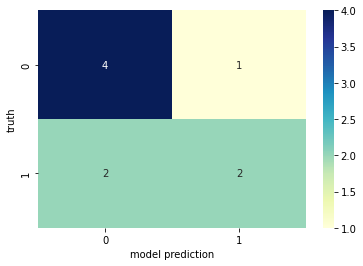

In [90]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [91]:
accuracy_score(y_test, y_pred)

0.6666666666666666

## Neural network

In [106]:
# sub in matrix/metadata file with subsetted mt
X = mtressubset_BDcontrol
Y = matrix_metadata_BDcontrol[["diagnosis_binary"]]

In [107]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
x_train = np.asarray(x_train).astype(np.float32)
y_train = np.asarray(y_train).astype(np.float32)
x_test = np.asarray(x_train).astype(np.float32)
y_test = np.asarray(y_train).astype(np.float32)

In [108]:
model = Sequential()
model.add(Dense(8, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [109]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [110]:
history = model.fit(x_train, y_train, epochs=200,  validation_split=0.2, batch_size=10, verbose=1)

Epoch 1/200
3/3 [==============================] - 1s 366ms/step - loss: 1607.7341 - accuracy: 0.5000 - val_loss: 290.5467 - val_accuracy: 0.5714
Epoch 2/200
3/3 [==============================] - 0s 22ms/step - loss: 355.7285 - accuracy: 0.4231 - val_loss: 46.9256 - val_accuracy: 0.8571
Epoch 3/200
3/3 [==============================] - 0s 25ms/step - loss: 162.6790 - accuracy: 0.5000 - val_loss: 0.4945 - val_accuracy: 0.7143
Epoch 4/200
3/3 [==============================] - 0s 44ms/step - loss: 95.7842 - accuracy: 0.5769 - val_loss: 0.6924 - val_accuracy: 0.5714
Epoch 5/200
3/3 [==============================] - 0s 21ms/step - loss: 60.4575 - accuracy: 0.5385 - val_loss: 0.6923 - val_accuracy: 0.5714
Epoch 6/200
3/3 [==============================] - 0s 23ms/step - loss: 22.4433 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.5714
Epoch 7/200
3/3 [==============================] - 0s 21ms/step - loss: 0.6668 - accuracy: 0.5000 - val_loss: 0.5923 - val_accuracy: 0.7143
Epoch 

3/3 [==============================] - 0s 22ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6924 - val_accuracy: 0.5714
Epoch 60/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6399 - accuracy: 0.5385 - val_loss: 0.6924 - val_accuracy: 0.5714
Epoch 61/200
3/3 [==============================] - 0s 18ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6924 - val_accuracy: 0.5714
Epoch 62/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6924 - val_accuracy: 0.5714
Epoch 63/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 64/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 65/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 66/200
3/3 [========

3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 118/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 119/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 120/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 121/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6399 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 122/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 123/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6925 - val_accuracy: 0.5714
Epoch 124/200
3/3 [=

Epoch 175/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 176/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 177/200
3/3 [==============================] - 0s 17ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 178/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 179/200
3/3 [==============================] - 0s 16ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 180/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 181/200
3/3 [==============================] - 0s 15ms/step - loss: 0.6398 - accuracy: 0.5385 - val_loss: 0.6927 - val_accuracy: 0.5714
Epoch 

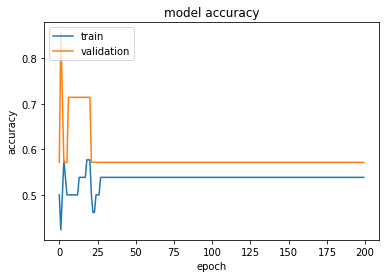

In [111]:
plt.plot(history.history["accuracy"], label="train")
plt.plot(history.history["val_accuracy"], label="validation")
plt.title("model accuracy")
plt.ylabel("accuracy")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

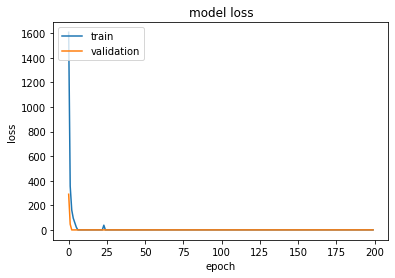

In [112]:
plt.plot(history.history["loss"], label="train")
plt.plot(history.history["val_loss"], label="validation")
plt.title("model loss")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.legend(["train", "validation"], loc='upper left')
plt.show()

In [113]:
score = model.evaluate(x_test, y_test, verbose=0)
score

[0.6510477662086487, 0.5454545617103577]

In [114]:
predictions = model.predict(x_test)
predictions.round(1)

array([[0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [1. ],
       [0.5],
       [1. ],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5],
       [0.5]], dtype=float32)

In [115]:
np.rint(predictions)

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.]], dtype=float32)

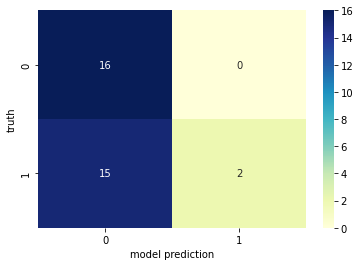

In [116]:
confusion_matrix = sklearn.metrics.confusion_matrix(y_test, np.rint(predictions))
sns.heatmap(confusion_matrix, annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

## Lasso

In [177]:
# input/output info
x = MTsubset_BDcontrol
y = matrix_metadata_BDcontrol["clinical_diagnosis"].replace({"BD":1, "control":0})

In [180]:
x_train, x_test, y_train, y_test = sklearn.model_selection.train_test_split(x, y, test_size=0.2, random_state=0, stratify=y)

In [181]:
clf = LogisticRegression(solver='liblinear', max_iter=9000, penalty="l1")
clf.fit(x_train.values, y_train.values)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LogisticRegression(max_iter=9000, penalty='l1', solver='liblinear')

In [182]:
y_pred = clf.predict(x_test)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


array([1, 1, 1, 0, 0, 0, 0, 0, 0])

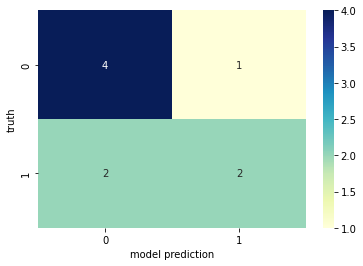

In [183]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu")
plt.xlabel("model prediction")
plt.ylabel("truth")
plt.show()

In [184]:
accuracy_score(y_test, y_pred)

0.6666666666666666

In [147]:
print('Coefficient of each feature:', clf.coef_)

Coefficient of each feature: [[ 1.54135544e-04 -1.00401373e-03  7.28669305e-04  7.04057633e-04
   5.98595077e-04  2.43270352e-04 -1.60896210e-04  3.34094218e-04
   9.09928766e-04  8.06465787e-04 -1.38492711e-04 -1.74212894e-03
   4.93284654e-03  0.00000000e+00  0.00000000e+00 -1.13872809e+00]]


### Lasso + CV

In [185]:
clf = LogisticRegressionCV(solver='liblinear', max_iter=5000, penalty="l1", cv=10)
clf.fit(x.values, y.values)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1206: ConvergenceWarning: Liblinear failed to converge, increas

LogisticRegressionCV(cv=10, max_iter=5000, penalty='l1', solver='liblinear')

In [187]:
y_pred = clf.predict(x)
y_pred

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


array([1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1])

In [188]:
clf.score(x, y)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:443: UserWarning: X has feature names, but LogisticRegressionCV was fitted without feature names
  warnings.warn(


1.0

In [166]:
print('Coefficient of each feature:', clf.coef_)

Coefficient of each feature: [[ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  4.11980975e-05  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  3.44640607e-04  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00 -6.21718629e-03  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+

### Boxplots of important Lasso features

<AxesSubplot:xlabel='diagnosis_binary', ylabel='ENST00000437291.6'>

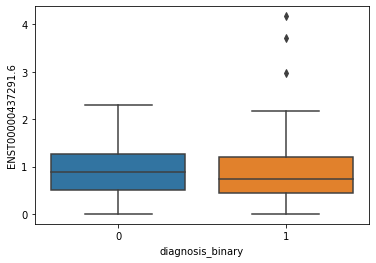

In [89]:
matrix_metadata_BDcontrol['ENST00000437291.6']
sns.boxplot(x=matrix_metadata_BDcontrol['diagnosis_binary'], y=matrix_metadata_BDcontrol['ENST00000437291.6'])